# Perkenalan

*   Nama  = Agustinus Ryan Wicaksono
*   Batch = FTDS - 003

**Dataset Description**

Dataset yang digunakan adalah sebuah gambar yang dapat diunduh pada link berikut: https://cdn.cnn.com/cnnnext/dam/assets/201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg

Sumber gambar: https://edition.cnn.com/2020/10/30/world/dog-dna-intl-scli-gbr-scn/index.html

**Assignment Instructions**

Graded Challenge 1 dikerjakan dalam format notebook dengen beberapa kriteria wajib di bawah ini:



1.   Gunakan library Numpy untuk kebutuhan pengolahan tipe data array dan beberapa operasi matematika.
2.   Jika diperlukan, silahkan menggunakan library Scipy, Numpy, Sympy atau lainnya untuk melakukan perhitungan matematika.
3.   Gunakan library PIL untuk membaca dan pengolahan gambar
4.   Untuk visualisasi, gunakan library Matplotlib
5.   Objektif dari project ini adalah mendeteksi edge suatu gambar dan melakukan operasi perkalian matriks. Sebagai clue, berikut langkah-langkah untuk mendeteksi edge:
  *   Hitung vektor gradien (turunan parsial) masing-masing pixel untuk masing-masing sumbu x dan y dengan rumus $\frac{\partial I}{\partial x}$ dan $\frac{\partial I}{\partial y}$
  *   Hitung gradient magnitude tiap pixel dengan rumus $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$
  *   Jika nilai magnitude melebihi angka threshold, maka edge terdeteksi (Biasanya threshold ~ 30)
6.   Untuk operasi matriks, buat matriks dengan nilai apapun yang bersesuaian dengan ukuran gambar dan sesuai dengan aturan perkalian matriks.
7.   Catatan: Anda dapat menggunakan metode apapun, baik menggunakan library atau melakukan perhitungan dengan metode numerik.
8.   Project dinyatakan selesai dan diterima untuk dinilai jika saat dilakukan Run All pada notebook, semua cell berhasil tereksekusi sampai akhir.
9.   Isi notebook harus mengikuti outline di bawah ini:
  *   Perkenalan
      
      Bab pengenalan harus diisi dengan identitas, metode yang ingin dilakukan guna mencapai tujuan.

  *   Import pustaka yang dibutuhkan
      
      Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

  *   Data Loading

      Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.

  *   Data Preprocessing

      Bagian ini berisi proses penyiapan data berupa preprocessing sebelum dilakukan processing lebih lanjut. Proses preprocessing dapat berupa filtering komponen warna ataupun ubah gambar warna menjadi grey, dan lain sebagainya.

  *  Image Processing

      Bagian ini berisi kode-kode serta perhitungan-perhitungan untuk mencapai tujuan.
  *   Hasil dan Kesimpulan

      Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan membandingkan hasil untuk beberapa nilai threshold dan juga hasil perkalian matriks yang telah dilakukan (dalam visualisasi gambar).

10.   Notebook harus diupload dalam akun GitHub masing-masing siswa untuk selanjutnya dinilai.

















# Import Pustaka

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from scipy import ndimage

# Loading Data

In [10]:
#Memasukkan gambar kedalam variable img
img = Image.open("gambar.jpg")

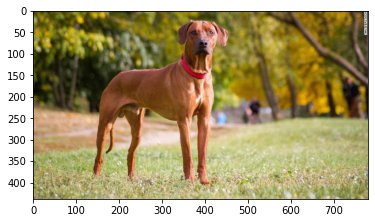

In [11]:
plt.imshow(np.array(img))

In [12]:
img.size

(780, 438)

# Data Preprocessing


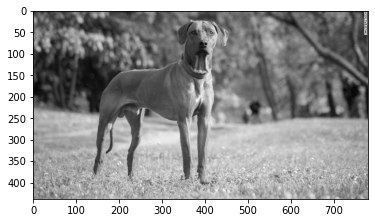

In [13]:
#Mengubah gambar menjadi warna abu - abu
imgGray = img.convert('L') 
plt.imshow(imgGray, cmap='gray')
plt.show()


# Image Processing

In [14]:
gx, gy = np.gradient(imgGray)

In [15]:
#Pembentukan gradient magnitude
G = np.sqrt(gx**2 + gy**2)

In [16]:
G

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

## Nilai Magnitude lebih dari 30

In [25]:
#Matriks baru dimana nilai magnitude lebih dari 30
A = np.argwhere(G > 30)
A

array([[  2, 771],
       [  2, 772],
       [  2, 773],
       ...,
       [431, 242],
       [431, 256],
       [431, 280]])

In [26]:
A.shape

(9110, 2)

Pada data gambar diatas, terdapat 9110 data yang memiliki nilai lebih dari 30




In [29]:
#Membentuk array untuk menyimpan nilai magnitude diatas 30
img_30 = np.zeros(G.shape)

In [30]:
#Melakukan proses copy dengan nilai magnitude diatas 30
i = 0
while i < A.shape[0]:
  img_30[A[i][0], A[i][1]] = G[A[i][0], A[i][1]].copy()
  i = i + 1

## Nilai Magnitude lebih dari 10

In [33]:
#Membentuk matriks kedua yang menyimpan nilai magnitude lebih dari 10
B = np.argwhere(G > 10)
B

array([[  0,  92],
       [  0,  93],
       [  0,  94],
       ...,
       [437, 770],
       [437, 771],
       [437, 772]])

In [34]:
B.shape

(70069, 2)

Pada data tersebut, terdapat 70069 data dengan nilai threshold lebih dari 10

In [35]:
#Membentuk array untuk menyimpan nilai magnitude diatas 10
img_10 = np.zeros(G.shape)

In [36]:
#Melakukan proses copy dengan nilai magnitude diatas 10
i = 0
while i < B.shape[0]:
  img_10[B[i][0], B[i][1]] = G[B[i][0], B[i][1]].copy()
  i = i + 1

## Nilai Magnitude lebih dari 50

In [38]:
#Membentuk matriks kedua yang menyimpan nilai magnitude lebih dari 50
C = np.argwhere(G > 50)
C

array([[  2, 771],
       [  2, 772],
       [  2, 773],
       ...,
       [421, 258],
       [422, 258],
       [424, 243]])

In [39]:
C.shape

(2099, 2)

Pada data tersebut, terdapat 2099 data yang memiliki nilai threshold > 50

In [40]:
#Membentuk array untuk menyimpan nilai magnitude diatas 50
img_50 = np.zeros(G.shape)

In [41]:
#Melakukan proses copy dengan nilai magnitude diatas 50
i = 0
while i < C.shape[0]:
  img_50[C[i][0], C[i][1]] = G[C[i][0], C[i][1]].copy()
  i = i + 1

Text(0.5, 1.0, 'Tres = 50')

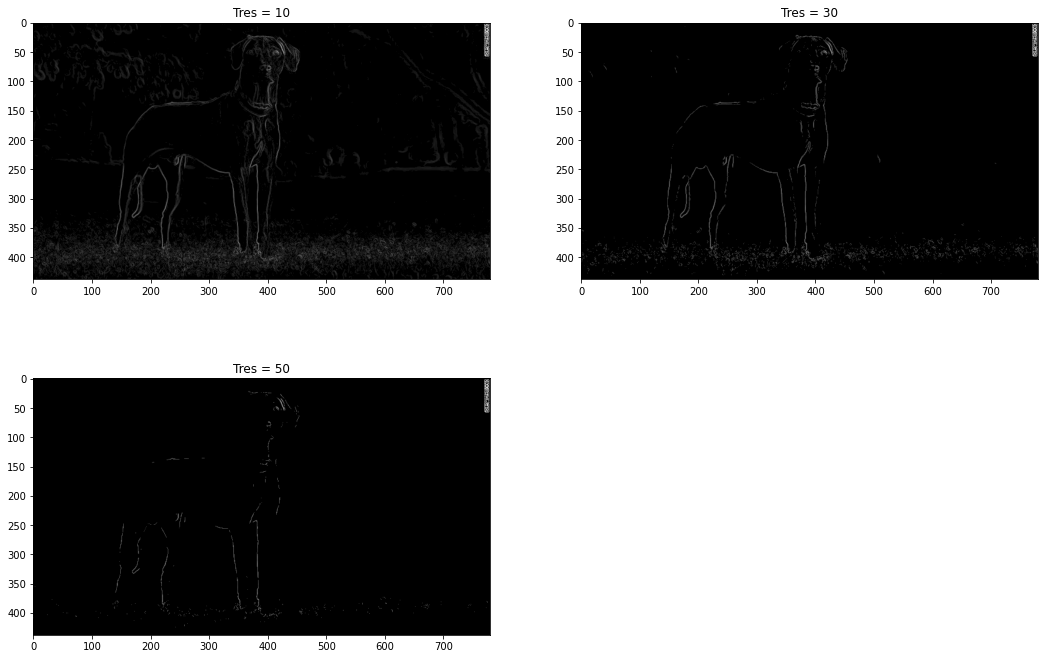

In [45]:
#Hasil edge detection
figure = plt.figure(figsize=(18,12))

# plot Treshold 10
figure.add_subplot(2, 2, 1)

plt.imshow(img_10, cmap='gray')
plt.title('Tres = 10')
  
# plot Treshold 30
figure.add_subplot(2, 2, 2)

plt.imshow(img_30, cmap='gray')
plt.title('Tres = 30')
  
# plot Treshold 50
figure.add_subplot(2, 2, 3)

plt.imshow(img_50, cmap='gray')
plt.title('Tres = 50')

# Perkalian Matriks

In [50]:
#Pengecekan apakah bentuk matriks img_10 dan img_30 sama
print("Bentuk matriks img_10 = "+ str(img_10.shape))
print("Bentuk matriks img_30 = "+ str(img_30.shape))

Bentuk matriks img_10 = (438, 780)
Bentuk matriks img_30 = (438, 780)


In [53]:
#Perkalian matriks dengan bentuk sama
perkalian = img_10*img_30
print(perkalian)

[[    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ... 11565.25     0.     976.  ]
 ...
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]
 [    0.       0.       0.   ...     0.       0.       0.  ]]


In [54]:
perkalian.shape

(438, 780)

Karena matriks img_10 dan Img_30 memiliki bentuk yang sama, maka perkalian dapat dilakukan dengan bentuk skalar. Maka dari itu, hasil bentuk matriksnya masih sama, yaitu (438, 780)

In [55]:
#Pembentukan matriks random untuk digunakan dalam perkalian dot
matriks_random = np.random.rand(780, 3)

In [57]:
#Perkalian img_50 dengan matriks random
perkalian_dot = img_50.dot(matriks_random)
print(perkalian_dot)

[[  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [202.07766367 369.13797318 387.2691645 ]
 ...
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]


In [58]:
perkalian_dot.shape

(438, 3)

Matrik img_50 memiliki bentuk (438, 780). Sedangkan matriks_random memiliki bentuk (780, 3). Maka dari itu dapat dilakukan perkalian matriks dengan persamaan C(m,n) = A(m,k) * B(k,n). 

Karena itu hasil akhir perkalian tersebut mendapatkan shape sebesar (438, 3)

# Hasil dan Kesimpulan

Hasil yang didapatkan dalam proses edge detection kali ini adalah sebagai berikut:


*   Percobaan ini dilakukan untuk melihat seberapa optimal sistem perhitungan yang dibangun dengan membandingkan nilai threshold yang dicari.
*   Ada tiga nilai threshold yang dibandingkan, yakni 10, 30 serta 50.
*   Gambar dengan nilai threshold 10 memiliki gambar anjing yang jelas namun gambar rerumputan dan pohon dibelakannya masih terlihat.
*   Gambar dengan nilai threshold 30 memiliki gambar anjing yang cukup jelas dan gambar rerumputan dan pohon tidak terlihat.
*   Gambar dengan nilai threshold 50 memiliki gambar anjing yang tidak cukup jelas.
*   Semakin besar nilai thresholdnya, maka gambar yang didapatkan semakin pudar.







